In [1]:
import geopandas as gpd
import pandas as pd

# 1. 讀取 Shapefile
Tazone362 = gpd.read_file(r"C:\Users\kjchang\OneDrive - 鼎漢國際工程顧問股份有限公司\台北鼎漢(B_6740)\6770貨運需求模式架構分析\Technical\08_交通分區檢討\圖資\freightmodel_TAZ362.shp")
Tazone16 = gpd.read_file(r"C:\Users\kjchang\OneDrive - 鼎漢國際工程顧問股份有限公司\台北鼎漢(B_6740)\6770貨運需求模式架構分析\Technical\08_交通分區檢討\圖資\freightmodel_FAZ16.shp")

# 2. 讀取 Excel 並轉為 DataFrame
cargo_112 = pd.read_excel(
    r"C:\Users\kjchang\OneDrive - 鼎漢國際工程顧問股份有限公司\台北鼎漢(B_6740)\6770貨運需求模式架構分析\Technical\01_汽車貨運調查\交通部統計處提供\接資料整理\112年汽車貨運調查資料_整理4.xlsx", 
    sheet_name="整_112"
)

# 3. 指定港口編號
port = [1, 5, 42, 80, 340, 121, 221, 217, 262, 261, 263, 54, 8, 188]  # 海空港埠所在鄉鎮市，海空港埠本身，再加麥寮

# 4. 加總「載貨重量」並按起_TAZ362 和 HS21 分組
cargo_112_O1 = (
    cargo_112
    .groupby(['起_TAZ362', 'HS21'], as_index=False)
    .agg(Weight=('載貨重量', lambda x: x.sum() / 365))
    .sort_values(by=['起_TAZ362', 'HS21'])
)

# 5. 資料清洗：排除 起_TAZ362 為 0 和 HS21 為空值的資料
cargo_112_O1['HS21'] = pd.to_numeric(cargo_112_O1['HS21'], errors='coerce')
cargo_112_O1 = cargo_112_O1[(cargo_112_O1['起_TAZ362'] != 0) & (cargo_112_O1['HS21'].notna())]

# 6. 計算 Weight 的平均值與摘要統計
print("Mean Weight:", cargo_112_O1['Weight'].mean(skipna=True))
print("Summary of Weight:")
print(cargo_112_O1['Weight'].describe())

# 7. 篩選 HS21 與科學園區相關的產業 (6, 16, 17, 18)
cargo_112_O97 = cargo_112_O1[cargo_112_O1['HS21'].isin([6, 16, 17, 18])]

# 8. 排除港口編號的分區
cargo_112_O98 = cargo_112_O97[~cargo_112_O97['起_TAZ362'].isin(port)]

# 9. 按起_TAZ362 分組並加總 Weight
cargo_112_O99 = (
    cargo_112_O98
    .groupby('起_TAZ362', as_index=False)
    .agg(Weight=('Weight', 'sum'))
    .sort_values(by='起_TAZ362')
)

# 10. 計算最終 Weight 的平均值與摘要統計
print("Mean Weight (Filtered):", cargo_112_O99['Weight'].mean(skipna=True))
print("Summary of Weight (Filtered):")
print(cargo_112_O99['Weight'].describe())


Mean Weight: 439.2810178529372
Summary of Weight:
count     3676.000000
mean       439.281018
std       1598.529814
min          0.019526
25%         23.572331
50%         86.096388
75%        302.516593
max      53922.547545
Name: Weight, dtype: float64
Mean Weight (Filtered): 583.6045410142999
Summary of Weight (Filtered):
count     319.000000
mean      583.604541
std       965.084993
min         0.019526
25%        94.664152
50%       253.844584
75%       666.032951
max      7531.833490
Name: Weight, dtype: float64


In [7]:
# 1. 加總「載貨重量」並按 迄_TAZ362 和 HS21 分組
cargo_112_D1 = (
    cargo_112
    .groupby(['迄_TAZ362', 'HS21'], as_index=False)
    .agg(Weight=('載貨重量', lambda x: x.sum() / 365))
    .sort_values(by=['迄_TAZ362', 'HS21'])
)

# 2. 資料清洗：排除 迄_TAZ362 為 0 和 HS21 為空值的資料
cargo_112_D1['HS21'] = pd.to_numeric(cargo_112_D1['HS21'], errors='coerce')
cargo_112_D1 = cargo_112_D1[(cargo_112_D1['迄_TAZ362'] != 0) & (cargo_112_D1['HS21'].notna())]

# 3. 計算 Weight 的平均值與摘要統計
print("Mean Weight (吸引):", cargo_112_D1['Weight'].mean(skipna=True))
print("Summary of Weight (吸引):")
print(cargo_112_D1['Weight'].describe())

# 4. 篩選 HS21 與科學園區相關的產業 (6, 16, 17, 18)
cargo_112_D97 = cargo_112_D1[cargo_112_D1['HS21'].isin([6, 16, 17, 18])]

# 5. 排除港口編號的分區
cargo_112_D98 = cargo_112_D97[~cargo_112_D97['迄_TAZ362'].isin(port)]

# 6. 按 迄_TAZ362 分組並加總 Weight
cargo_112_D99 = (
    cargo_112_D98
    .groupby('迄_TAZ362', as_index=False)
    .agg(Weight=('Weight', 'sum'))
    .sort_values(by='迄_TAZ362')
)

# 7. 計算最終 Weight 的平均值與摘要統計
print("Mean Weight (吸引, Filtered):", cargo_112_D99['Weight'].mean(skipna=True))
print("Summary of Weight (吸引, Filtered):")
print(cargo_112_D99['Weight'].describe())


Mean Weight (吸引): 407.5711816323567
Summary of Weight (吸引):
count     3962.000000
mean       407.571182
std       1209.492281
min          0.019526
25%         26.498825
50%         93.552851
75%        324.914284
max      29481.058934
Name: Weight, dtype: float64
Mean Weight (吸引, Filtered): 624.9377137574586
Summary of Weight (吸引, Filtered):
count      326.000000
mean       624.937714
std       1055.636230
min          0.019526
25%        105.352888
50%        276.913712
75%        746.202916
max      12021.872123
Name: Weight, dtype: float64


C:\Users\kjchang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kjchang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27773 (\N{CJK UNIFIED IDEOGRAPH-6C7D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kjchang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36554 (\N{CJK UNIFIED IDEOGRAPH-8ECA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kjchang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qb

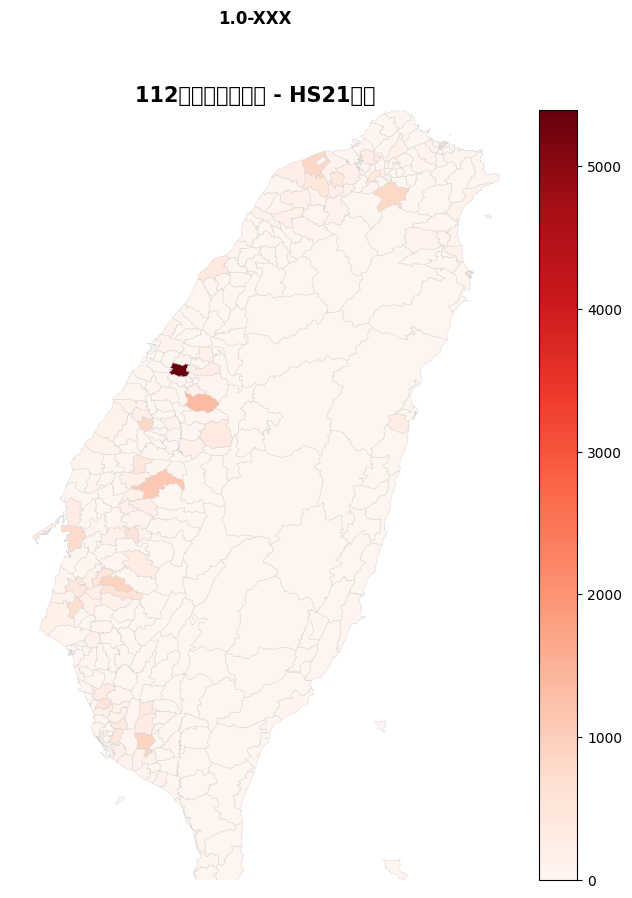

In [12]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# 假設資料和地圖已經準備好
# cargo_112_O1: DataFrame, 包含起始區域數據
# cargo_112_D1: DataFrame, 包含吸引區域數據
# Tazone362: GeoDataFrame, 包含 TAZ361 區域形狀
# Tazone16: GeoDataFrame, 顯示黑色邊框的地圖區域

# # 設置輸出目錄
# output_dir_O = "D:/yyt/09_貨運/05 汽車貨運調查相關/交通部統計處提供/R_出圖(產生吸引)/HS21產生_112年"
# output_dir_D = "D:/yyt/09_貨運/05 汽車貨運調查相關/交通部統計處提供/R_出圖(產生吸引)/HS21吸引_112年"
# os.makedirs(output_dir_O, exist_ok=True)
# os.makedirs(output_dir_D, exist_ok=True)

# 生成地圖
goods = sorted(cargo_112_O1['HS21'].unique())  # 獲取所有 HS21 唯一值
goods = goods[:1]
for i in goods:
    # 獲取名稱與標題
    freightname = 'XXX'  # 假設該函數已定義
    subtitlename = f"{i}-{freightname}"
    pic_name_O = f"{i}_{freightname}_112年分布.png"
    pic_name_D = f"{i}_{freightname}_112年吸引分布.png"
    
    # 過濾起始區域數據
    cargo_112_O1_filtered = cargo_112_O1[cargo_112_O1['HS21'] == i]
    Tazone362_O = Tazone362.merge(
        cargo_112_O1_filtered, left_on="TAZ361", right_on="起_TAZ362", how="left"
    ).fillna(0)
    
    # 過濾吸引區域數據
    cargo_112_D1_filtered = cargo_112_D1[cargo_112_D1['HS21'] == i]
    Tazone362_D = Tazone362.merge(
        cargo_112_D1_filtered, left_on="TAZ361", right_on="迄_TAZ362", how="left"
    ).fillna(0)
    
    # 1. 繪製「起始區域」地圖
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    Tazone362_O.plot(column='Weight', cmap='Reds', linewidth=0.3, ax=ax, edgecolor='lightgrey', legend=True)
    Tazone16.plot(ax=ax, color="none", edgecolor="black", linewidth=1)
    ax.set_xlim(119.9, 122)
    ax.set_ylim(22, 25.3)
    plt.title("112年汽車貨運調查 - HS21分類", fontsize=15, fontweight="bold")
    plt.suptitle(subtitlename, fontsize=12, fontweight="bold")
    plt.axis("off")
    # plt.savefig(os.path.join(output_dir_O, pic_name_O), dpi=300, bbox_inches="tight")
    # plt.close()
    plt.show()
    
    # # 2. 繪製「吸引區域」地圖
    # fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    # Tazone362_D.plot(column='Weight', cmap='Blues', linewidth=0.3, ax=ax, edgecolor='lightgrey', legend=True)
    # Tazone16.plot(ax=ax, color="none", edgecolor="black", linewidth=1)
    # ax.set_xlim(119.9, 122)
    # ax.set_ylim(22, 25.3)
    # plt.title("112年汽車貨運調查 - HS21分類", fontsize=15, fontweight="bold")
    # plt.suptitle(subtitlename, fontsize=12, fontweight="bold")
    # plt.axis("off")
    # plt.savefig(os.path.join(output_dir_D, pic_name_D), dpi=300, bbox_inches="tight")
    # plt.close()


In [13]:
Tazone362_D

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,cou_town,Field,Field1,TAZ361,TAZ16,geometry,迄_TAZ362,HS21,Weight
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,臺東縣成功鎮,0,0,325.0,16.0,"POLYGON ((121.40981 23.2137, 121.40984 23.2136...",325.0,1.0,33.815523
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,屏東縣佳冬鄉,0,0,311.0,13.0,"POLYGON ((120.54845 22.46067, 120.54853 22.460...",311.0,1.0,95.145452
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,雲林縣麥寮鄉,0,0,188.0,9.0,"POLYGON ((120.30198 23.81624, 120.30198 23.815...",188.0,1.0,25.412167
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,臺東縣綠島鄉,0,0,334.0,16.0,"MULTIPOLYGON (((121.49154 22.67746, 121.49184 ...",0.0,0.0,0.000000
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,臺東縣蘭嶼鄉,0,0,339.0,16.0,"MULTIPOLYGON (((121.61179 21.9429, 121.61133 2...",0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,E11,64000110,高雄市,高雄機場,Xiaogang District,E,64000,高雄機場,0,0,354.0,12.0,"POLYGON ((120.36684 22.57784, 120.3668 22.5775...",0.0,0.0,0.000000
359,C01,10017010,基隆市,基隆港,Zhongzheng District,C,10017,基隆港,0,0,355.0,1.0,"POLYGON ((121.75467 25.16234, 121.75516 25.162...",0.0,0.0,0.000000
360,H06,68000060,桃園市,桃園機場,Dayuan District,H,68000,桃園機場,928378,657567,353.0,3.0,"POLYGON ((121.2459 25.09922, 121.25037 25.0882...",0.0,0.0,0.000000
361,A01,63000010,臺北市,松山區,Songshan District,A,63000,臺北市松山區,0,0,8.0,2.0,"POLYGON ((121.54412 25.06711, 121.54449 25.067...",8.0,1.0,7.140167
